In [130]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('csv/Just_Chatting.csv')
df2 = pd.read_csv('csv/League_of_Legends.csv')
df3 = pd.read_csv('csv/Valorant.csv')
df4 = pd.read_csv('csv/GTA5.csv')
df5 = pd.read_csv('csv/Apex_Legends.csv')

df1.insert(3,"Category", "Just Chatting")
df2.insert(3,"Category", "League_of_Legends")
df3.insert(3,"Category", "Valorant")
df4.insert(3,"Category", "GTA5")
df5.insert(3,"Category", "Apex_Legends")

dfs = [df1, df2,df3,df4,df5]
result = pd.concat(dfs,ignore_index=True)
result['ID'] = result.index
display(result)

,Title,Creator,Viewers,Category,Language,User Link,Avatar Link,Thumbnail Link,ID
0,手已痛 5/23,餐餐自由配 (blusewilly_retry),3200,Just Chatting,可以出一張鈔票,https://www.twitch.tv/blusewilly_retry,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,0
1,完了 不知道要幹嘛,野生的淡水人 (wildtamsuinese),706,Just Chatting,中文,https://www.twitch.tv/wildtamsuinese,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,1
2,烟花－0523－十點半法還 第一次羊娃娃樣品失敗 回爐重造🍥🌟 !表單 !LINE ꜀(^....,烟花蹦蹦蹦 (hennie2001),1900,Just Chatting,貪吃羊,https://www.twitch.tv/hennie2001,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,2
3,한 갱갱갱~,한갱 (woohankyung),2600,Just Chatting,한국어,https://www.twitch.tv/woohankyung,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,3
4,❤️愛愛❤️⏰每月送PS5 !抽獎🔴開台DC｜超讚免費點數 👉!MY !YT !魔儲｜ 【🍊...,蝦愛橘子 (shuteye_orange),2500,Just Chatting,中文,https://www.twitch.tv/shuteye_orange,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,4
...,...,...,...,...,...,...,...,...,...
145,5/23 欸喂,潘潘潘婷 (pt0503),24,Apex_Legends,啾啾,https://www.twitch.tv/pt0503,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,145
146,【戰鬥紅茶】its time to go to bed... !新片2,戰鬥紅茶 (niubie1337),8,Apex_Legends,中文,https://www.twitch.tv/niubie1337,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,146
147,ABSOLUTE FARMAGE TODAY,MaTaFe_,284,Apex_Legends,pro,https://www.twitch.tv/matafe_,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,147
148,422,軍閥餅乾 (luna33th),38,Apex_Legends,apex,https://www.twitch.tv/luna33th,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/previews-ttv/live...,148


In [131]:
import re
# korean 1
for i in result["Language"]:
    if re.search("[\uac00-\ud7a3]", i):
        result["Language"].replace(i,str(1), inplace=True)

# japanese 2
for i in result["Language"]:
    if re.search("[\u3040-\u30ff]", i):
        result["Language"].replace(i,str(2), inplace=True)
# chinese 3
for i in result["Language"]:
    if re.search("[\u4e00-\u9FFF]", i):
        result["Language"].replace(i,str(3), inplace=True)

# English 0
for i in result["Language"]:
    if (i != '1' and i != '2' and i != '3'):
       result["Language"].replace(i,str(0), inplace=True)

result["Language"] = result["Language"].astype(int)


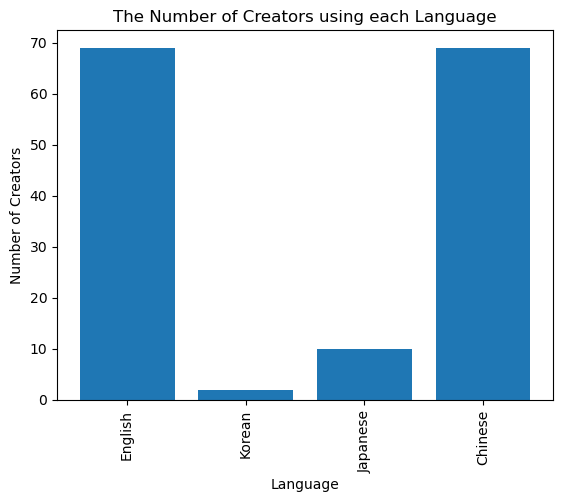

In [132]:
import matplotlib.pyplot as plt


sum0 = result['Language'].value_counts()[0]
sum1 = result['Language'].value_counts()[1]
sum2 = result['Language'].value_counts()[2]
sum3 = result['Language'].value_counts()[3]

x = ["English", "Korean", "Japanese", "Chinese"]
y = [sum0,sum1,sum2,sum3]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("The Number of Creators using each Language")
plt.xlabel("Language")
plt.ylabel("Number of Creators")
plt.savefig("charts/Langauge useage.jpg",bbox_inches = 'tight')
plt.show()

In [133]:
result["Category"].replace("Just Chatting",str(0), inplace=True)
result["Category"].replace("League_of_Legends",str(1), inplace=True)
result["Category"].replace("Valorant",str(2), inplace=True)
result["Category"].replace("GTA5",str(3), inplace=True)
result["Category"].replace("Apex_Legends",str(4), inplace=True)
result["Language"] = result["Language"].astype(int)



In [134]:
result = result.drop("Title", axis=1)
result = result.drop("Creator", axis=1)
result = result.drop("User Link", axis=1)
result = result.drop("Avatar Link", axis=1)
result = result.drop("Thumbnail Link", axis=1)
result.head()

,Viewers,Category,Language,ID
0,3200,0,3,0
1,706,0,3,1
2,1900,0,3,2
3,2600,0,1,3
4,2500,0,3,4


In [135]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = DecisionTreeClassifier()
gnb = GaussianNB()
supp = svm.SVC()

feature_cols = ['ID', 'Viewers', 'Language']
X = result[feature_cols] # Features
y = result.Category #target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

gnb_y_pred=  gnb.fit(X_train, y_train).predict(X_test)
clf_y_pred = clf.fit(X_train,y_train).predict(X_test)
supp_y_pred=  supp.fit(X_train, y_train).predict(X_test)

#Predict the response for test dataset
print("Decision Tree Accuracy:",int(metrics.accuracy_score(y_test, clf_y_pred)*100),"%")
print("Guassian Accuracy:",int(metrics.accuracy_score(y_test, gnb_y_pred)*100),"%")
print("SVM Accuracy:",int(metrics.accuracy_score(y_test, supp_y_pred)*100),"%")


Decision Tree Accuracy: 93 %
Guassian Accuracy: 80 %
SVM Accuracy: 20 %
